In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [102]:
eeg_df = pd.read_csv('../input/confused-eeg/EEG_data.csv')
info_df = pd.read_csv('../input/confused-eeg/demographic_info.csv')

In [4]:
eeg_df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [5]:
info_df.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


# Merging DataFrames

In [103]:
info_df.rename(columns={'subject ID': 'SubjectID'}, inplace=True)
data = info_df.merge(eeg_df, on='SubjectID')

In [78]:
data.head(10)

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
5,0,25,Han Chinese,M,0.0,44.0,66.0,73.0,1786446.0,176766.0,59352.0,26157.0,15054.0,33669.0,33782.0,31750.0,0.0,0.0
6,0,25,Han Chinese,M,0.0,43.0,69.0,130.0,635191.0,122446.0,90107.0,65072.0,36230.0,53019.0,62938.0,59307.0,0.0,0.0
7,0,25,Han Chinese,M,0.0,40.0,61.0,-2.0,161098.0,12119.0,1963.0,809.0,1277.0,3186.0,3266.0,2518.0,0.0,0.0
8,0,25,Han Chinese,M,0.0,43.0,69.0,17.0,492796.0,120998.0,63697.0,68242.0,10769.0,88403.0,73756.0,22676.0,0.0,0.0
9,0,25,Han Chinese,M,0.0,47.0,69.0,-59.0,82048.0,116131.0,47317.0,26197.0,41642.0,28866.0,32551.0,41810.0,0.0,0.0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  int64  
 1    age                12811 non-null  int64  
 2    ethnicity          12811 non-null  object 
 3    gender             12811 non-null  object 
 4   VideoID             12811 non-null  float64
 5   Attention           12811 non-null  float64
 6   Mediation           12811 non-null  float64
 7   Raw                 12811 non-null  float64
 8   Delta               12811 non-null  float64
 9   Theta               12811 non-null  float64
 10  Alpha1              12811 non-null  float64
 11  Alpha2              12811 non-null  float64
 12  Beta1               12811 non-null  float64
 13  Beta2               12811 non-null  float64
 14  Gamma1              12811 non-null  float64
 15  Gamma2              12811 non-null  float64
 16  pred

In [80]:
data.describe()

,SubjectID,age,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000
mean,4.487394,25.409960,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606
std,2.865373,2.205148,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861
min,0.000000,24.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000
25%,2.000000,24.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000
50%,4.000000,25.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000
75%,7.000000,25.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000
max,9.000000,31.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000


In [83]:
data0 = data
data0['Sample'] = data0.reset_index().index +0.5
data0.head()

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Sample
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,0.5
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,1.5
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,2.5
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,3.5
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,4.5


In [85]:
data0.rename(columns={' gender':'Gender'}, inplace=True)
data0.rename(columns={' age':'Age'}, inplace=True)
data0.rename(columns={' ethnicity':'Ethnicity'}, inplace=True)

In [86]:
#  change categorical data to numerical data
data0['Gender'] = data0['Gender'].replace({'M':1, 'F':0})
data0['Ethnicity'] = data0['Ethnicity'].replace({'Han Chinese':0,'Bengali':1,'English':2})

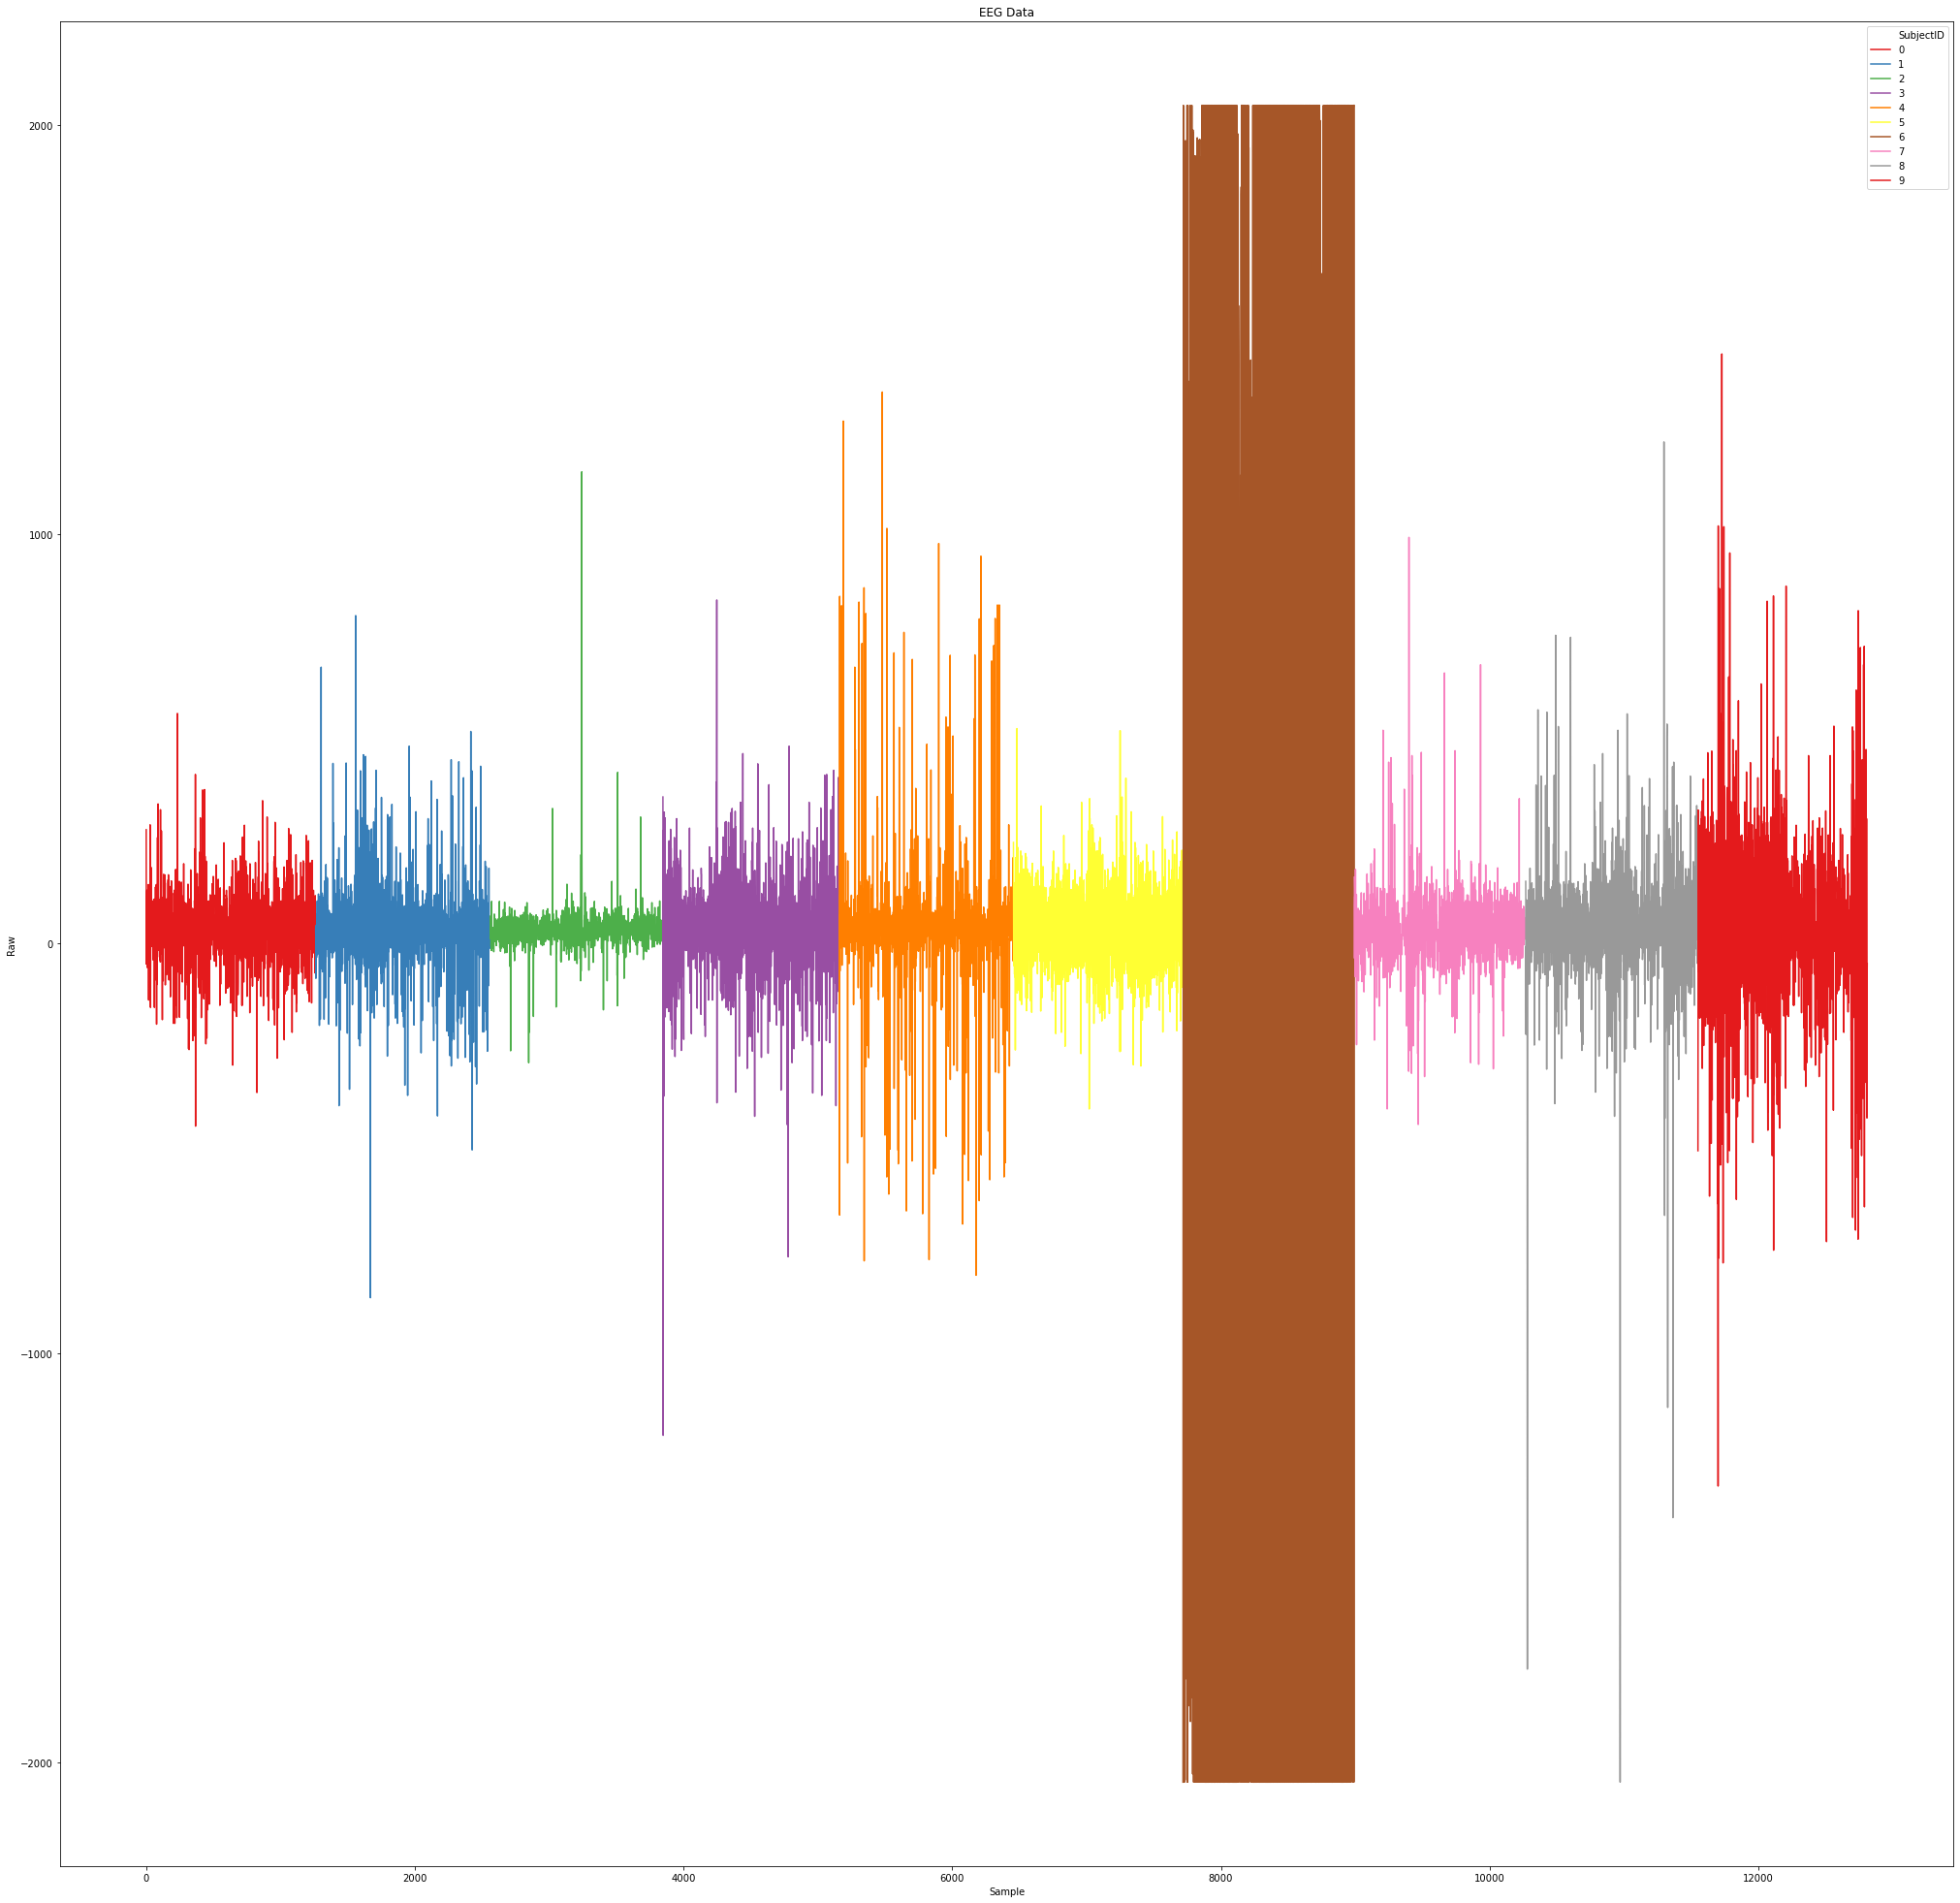

In [87]:
plt.figure(figsize=(35, 35))  # Set the size of the plot


sns.lineplot(data= data, x='Sample', y='Raw', hue='SubjectID', palette='Set1')

plt.xlabel('Sample')  # Set the x-axis label
plt.ylabel('Raw')  # Set the y-axis label
plt.title('EEG Data')  # Set the plot title

plt.show()  # Display the plot

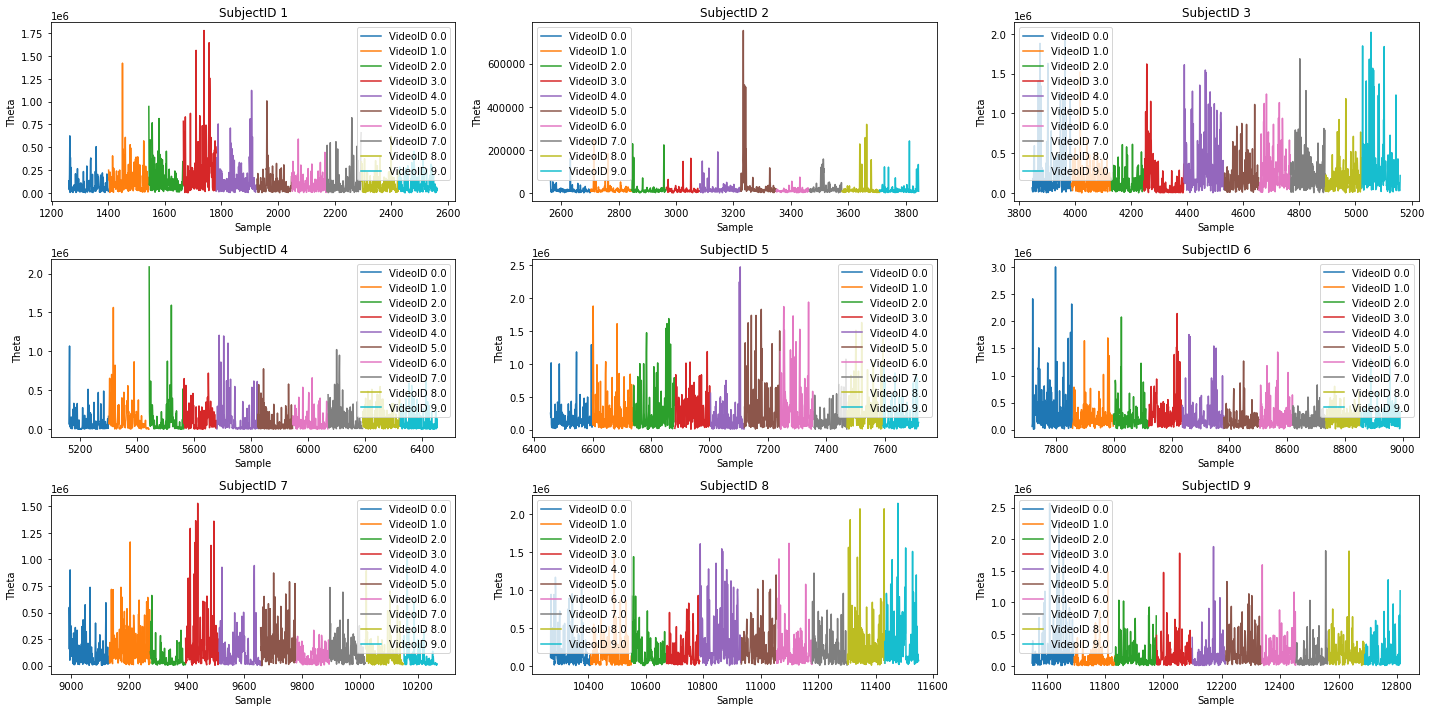

In [88]:
# Filter the DataFrame for subjects 1-9
filtered_df = data0[data0['SubjectID'].between(0, 9)]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

# Iterate over subjects and plot each VideoID subplot
for i, ax in enumerate(axes.flatten()):
    subject_data = filtered_df[filtered_df['SubjectID'] == i+1]
    for video_id, group_data in subject_data.groupby('VideoID'):
        ax.plot(group_data['Sample'], group_data['Theta'], label=f'VideoID {video_id}')
    ax.set_xlabel('Sample')
    ax.set_ylabel('Theta')
    ax.set_title(f'SubjectID {i+1}')
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Cleaning

In [104]:
data = data.drop(['SubjectID', 'VideoID', 'predefinedlabel'], axis=1)

In [105]:
data.columns

Index([' age', ' ethnicity', ' gender', 'Attention', 'Mediation', 'Raw',
       'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1',
       'Gamma2', 'user-definedlabeln'],
      dtype='object')

In [106]:
data.rename(columns={' age': 'Age', ' ethnicity': 'Ethnicity', ' gender': 'Gender', 'user-definedlabeln': 'Label'}, inplace=True)

In [107]:
data['Label'] = data['Label'].astype(np.int)

In [14]:
data.head()

,Age,Ethnicity,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label
0,25,Han Chinese,M,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0
1,25,Han Chinese,M,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0
2,25,Han Chinese,M,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0
3,25,Han Chinese,M,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0
4,25,Han Chinese,M,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0


In [108]:
print("Missing values:", data.isna().sum().sum())

Missing values: 0


# Encoding Features

In [109]:
data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [110]:
data['Gender'] = data['Gender'].apply(lambda x: 1  if x == 'M' else 0)

In [111]:
data['Ethnicity'].unique()

array(['Han Chinese', 'English', 'Bengali'], dtype=object)

In [112]:
ethnicity_dummies = pd.get_dummies(data['Ethnicity'])
data = pd.concat([data, ethnicity_dummies], axis=1)
data = data.drop('Ethnicity', axis=1)

In [113]:
data.head()

,Age,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label,Bengali,English,Han Chinese
0,25,1,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0,0,1
1,25,1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0,0,1
2,25,1,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0,0,1
3,25,1,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0,0,1
4,25,1,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0,0,1


In [114]:
print("Non-numeric columns:", len(data.select_dtypes('object').columns))

Non-numeric columns: 0


In [115]:
data.dtypes

Age              int64
Gender           int64
Attention      float64
Mediation      float64
Raw            float64
Delta          float64
Theta          float64
Alpha1         float64
Alpha2         float64
Beta1          float64
Beta2          float64
Gamma1         float64
Gamma2         float64
Label            int64
Bengali          uint8
English          uint8
Han Chinese      uint8
dtype: object

# EDA

In [116]:
features = data.drop('Label', axis=1).copy()
num_features = len(features.columns)
print("Features:", num_features)

Features: 16


In [117]:
categorical_features = ['Age', 'Gender', 'Bengali', 'English', 'Han Chinese']
continuous_features = ['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']

print("Categorical Features:", len(categorical_features))
print("Continuous Features:", len(continuous_features))

Categorical Features: 5
Continuous Features: 11


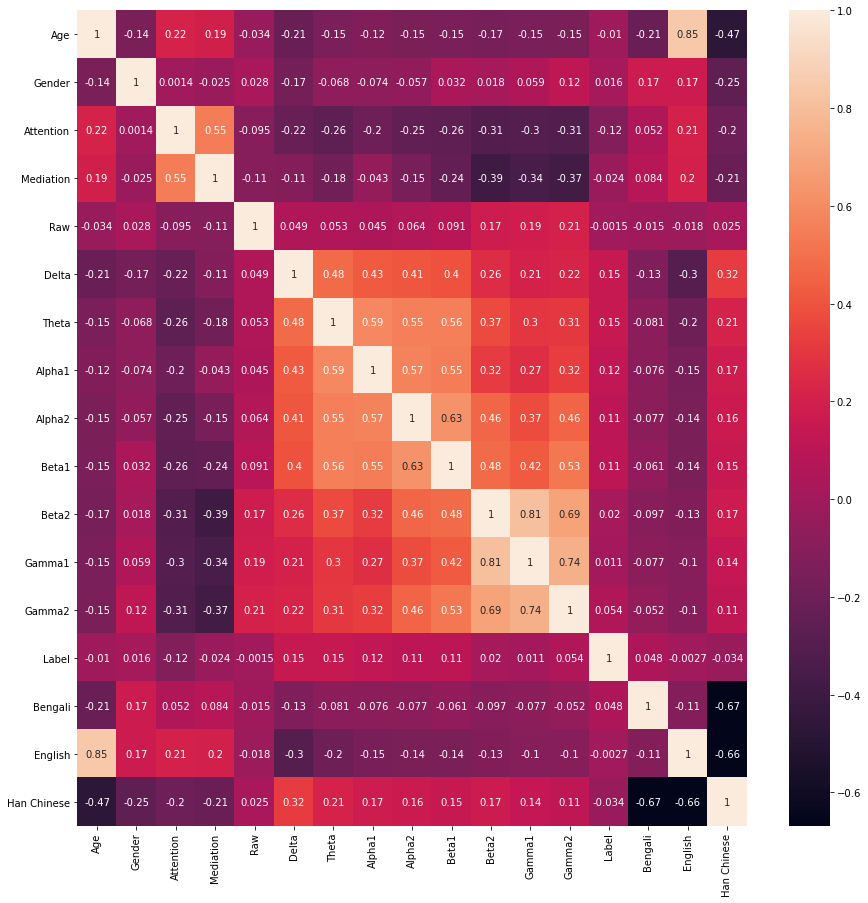

In [118]:
plt.figure(figsize = (15,15))
cor_matrix = data.corr()
sns.heatmap(cor_matrix,annot=True)

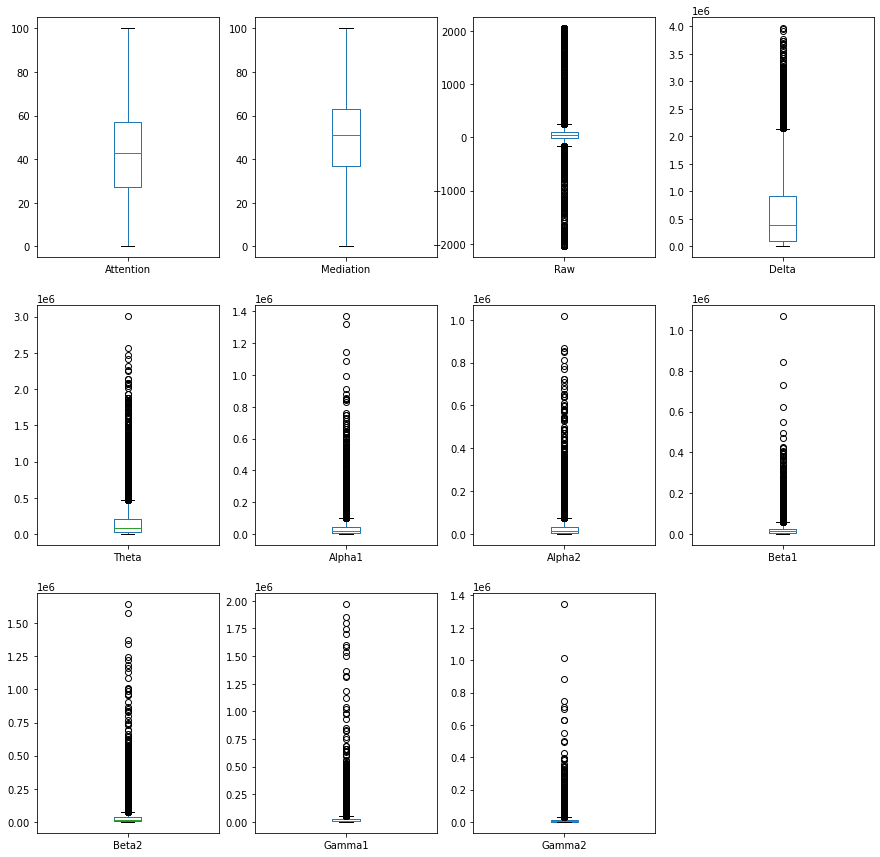

In [26]:
features[continuous_features].plot(kind='box', figsize=(15, 15), subplots=True, layout=(3, 4))
plt.show()

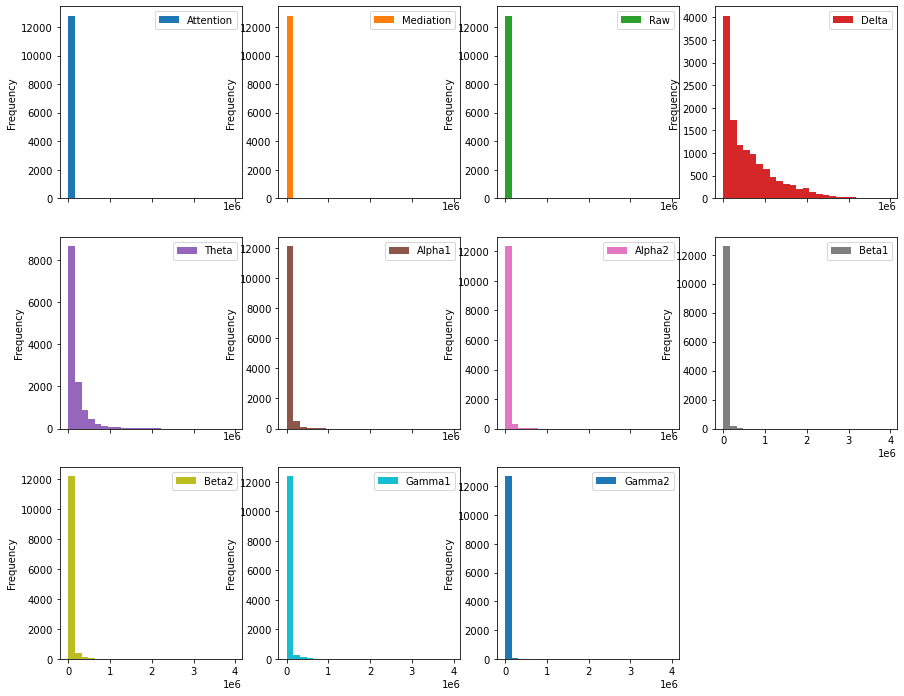

In [27]:
features[continuous_features].plot(kind='hist', bins=25, figsize=(15, 12), subplots=True, layout=(3, 4))
plt.show()

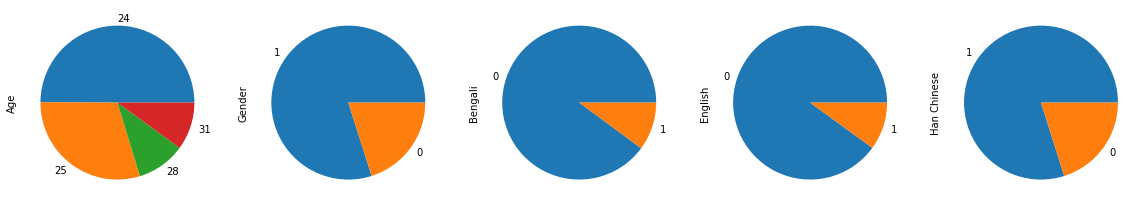

In [119]:
plt.figure(figsize=(20, 5))
for feature in categorical_features:
    plt.subplot(1, 5, categorical_features.index(feature) + 1)
    features[feature].value_counts().plot(kind='pie')
plt.show()

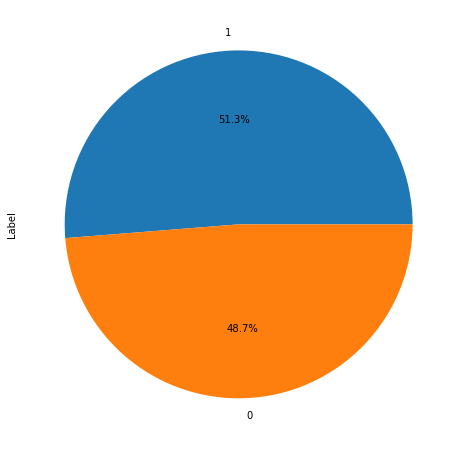

In [120]:
plt.figure(figsize=(8, 8))
data['Label'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.show()

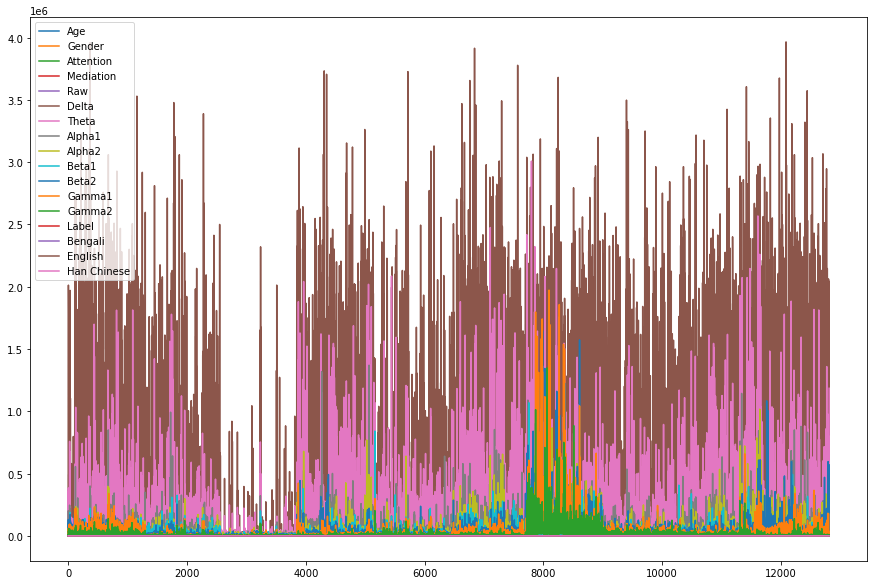

In [28]:
data.plot(figsize = (15,10))

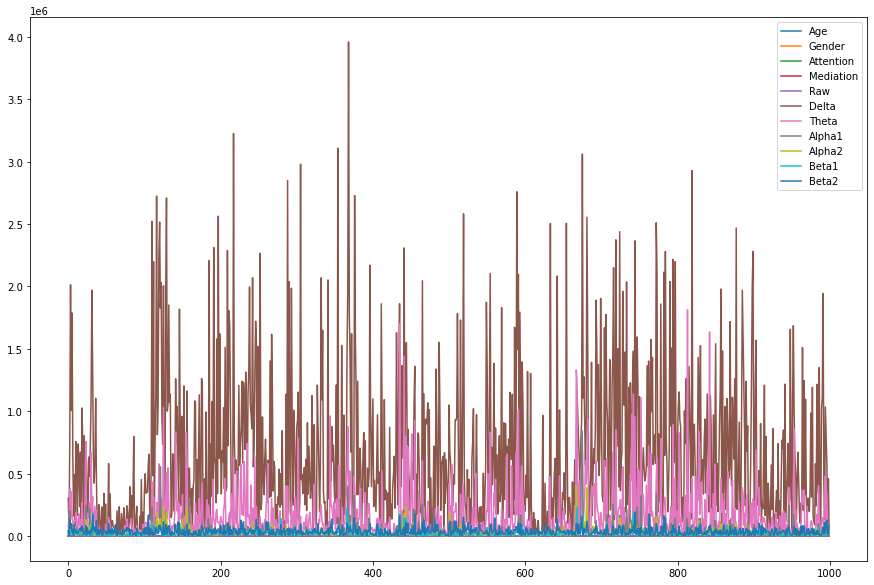

In [29]:
data.iloc[:1000,:11].plot(figsize = (15,10))

## Multivariate Analysis

<Figure size 1440x1440 with 0 Axes>

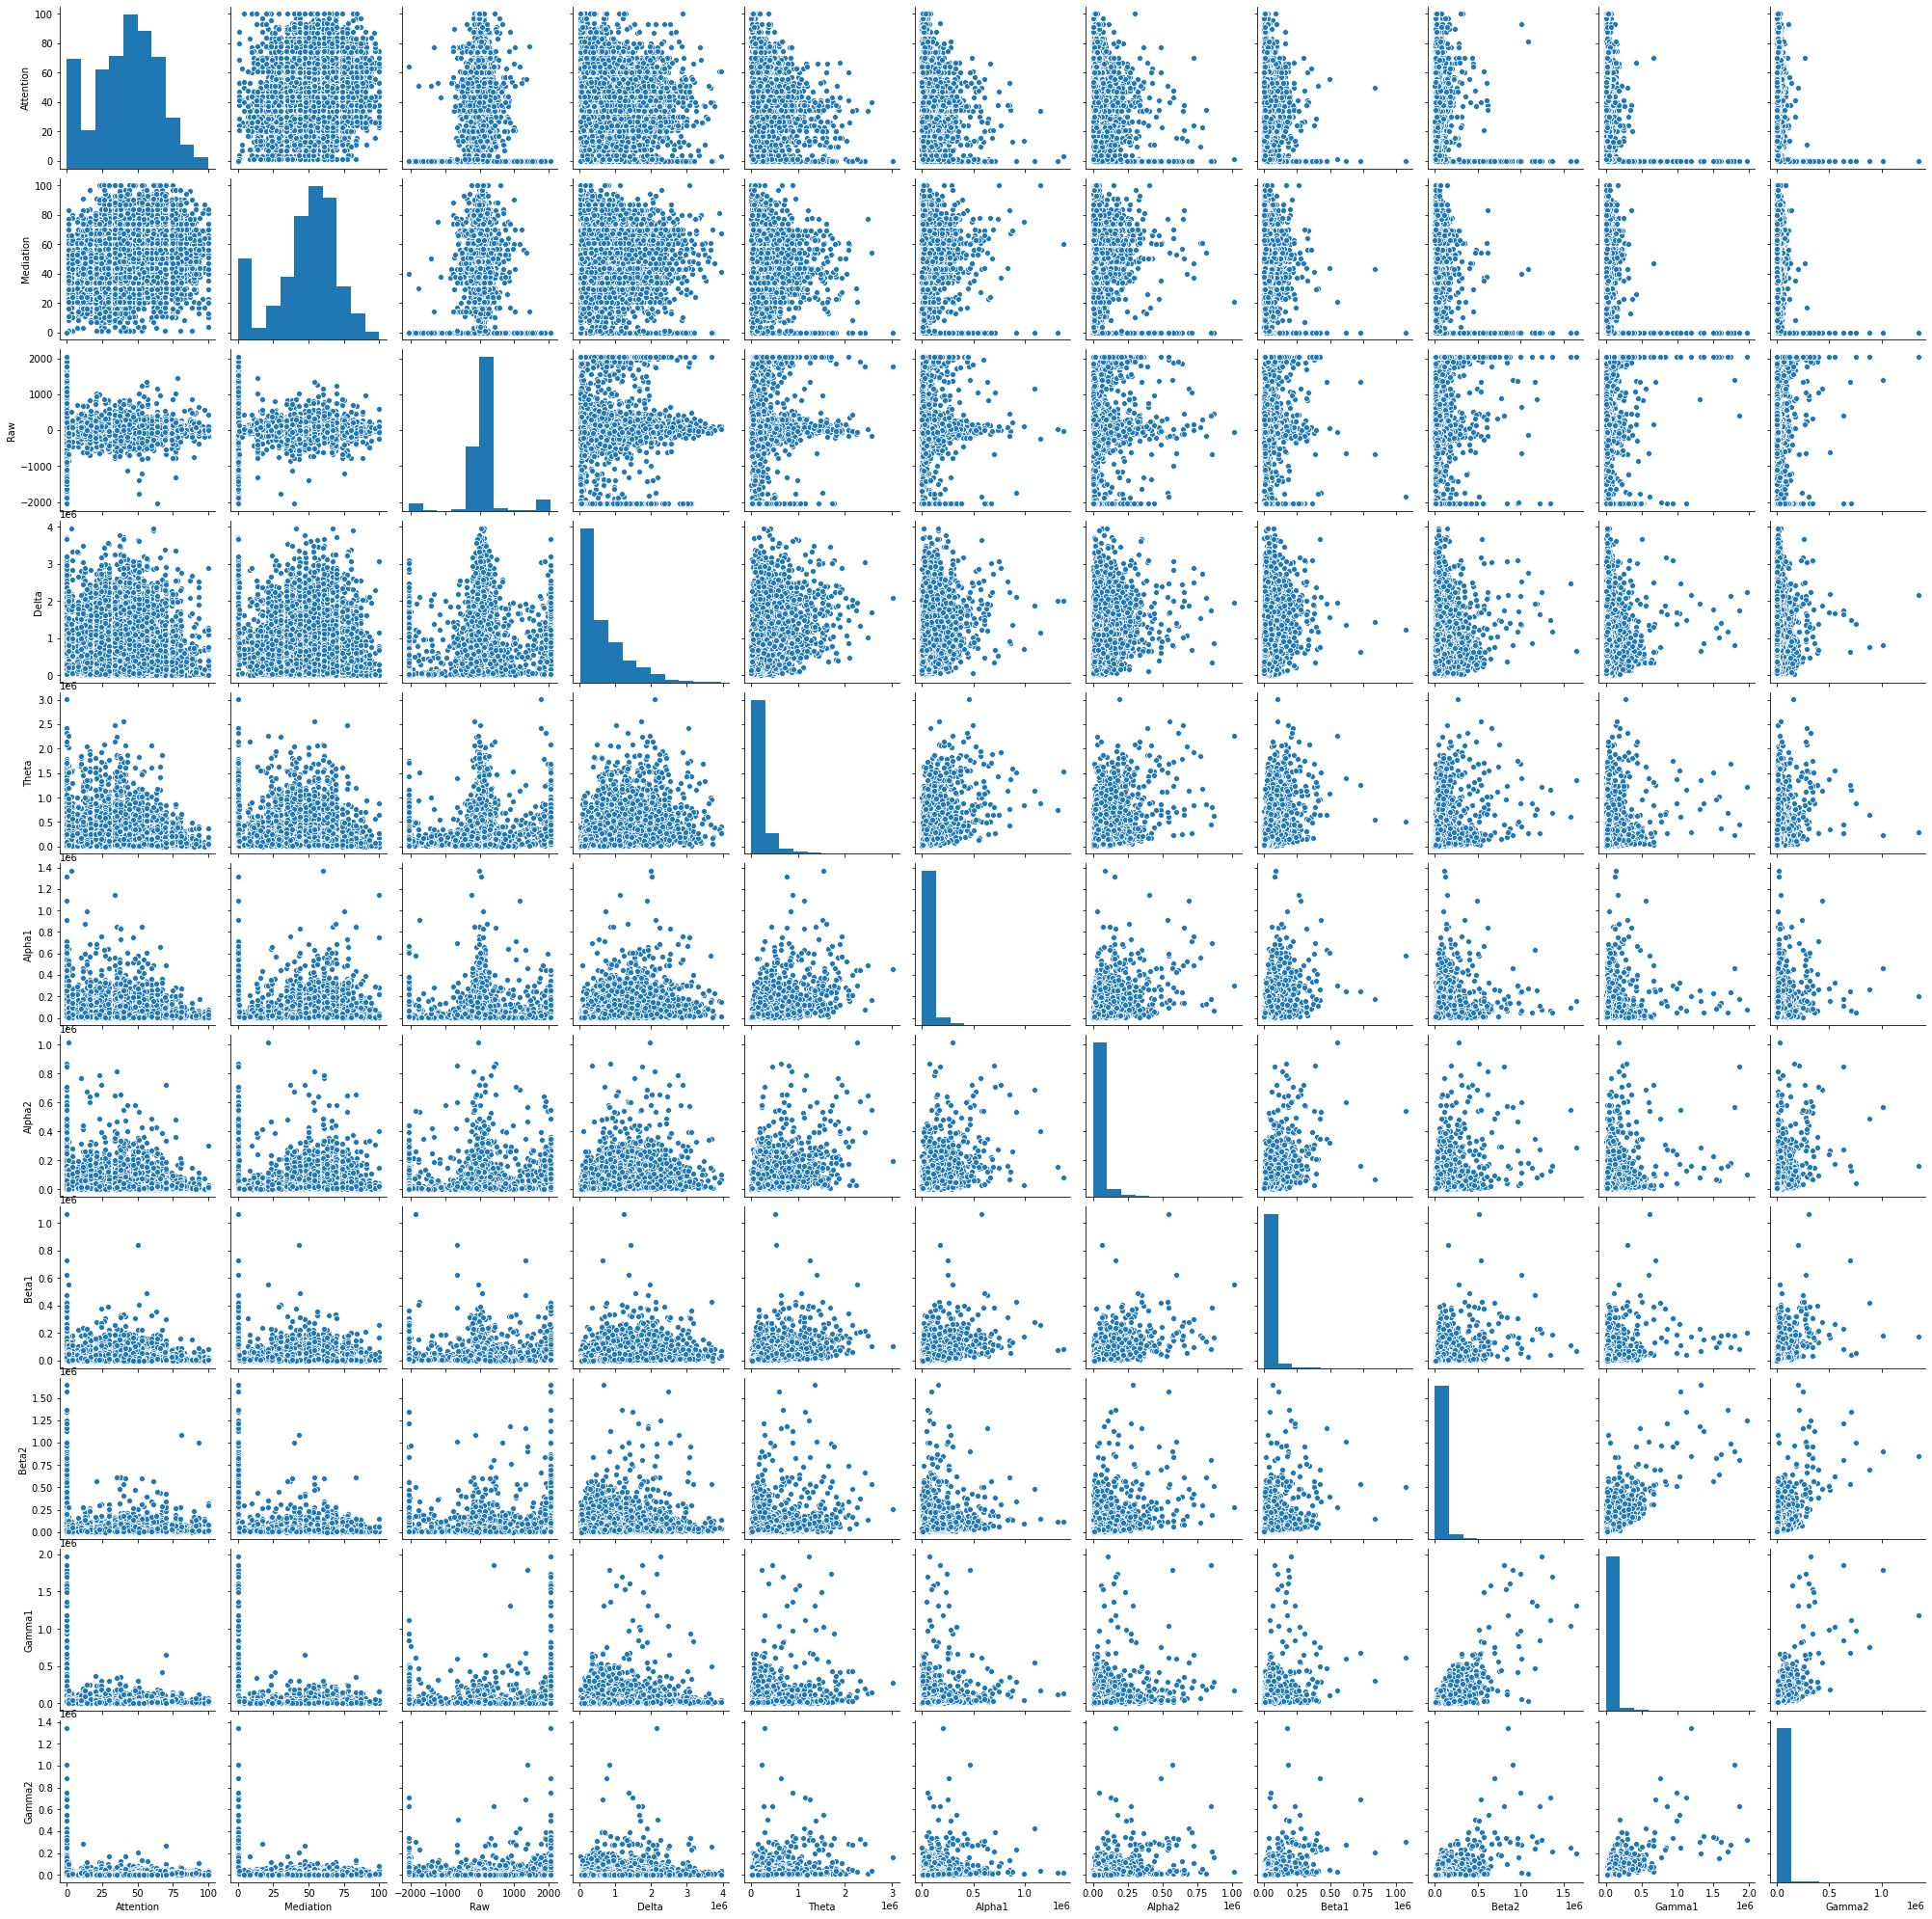

In [30]:
plt.figure(figsize=(20, 20))
sns.pairplot(features[continuous_features])
plt.show()

# Splitting/Scaling

In [31]:
y = data['Label'].copy()
X = data.drop('Label', axis=1).copy()

In [32]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [34]:
print(X_train)
print(len(X_train))
print(X_train.shape)
print('-----------------------------------------')
print(y_train)
print(y_train.shape)
print('-----------------------------------------')
print(X_test)
print(X_test.shape)
print('-----------------------------------------')
print(y_test)
print(y_test.shape)

[[-0.63941983  0.50156067 -1.78445846 ... -0.33533899 -0.33375238
   0.50204819]
 [-0.18591779  0.50156067 -0.1431351  ... -0.33533899 -0.33375238
   0.50204819]
 [-0.63941983  0.50156067  0.41837026 ... -0.33533899 -0.33375238
   0.50204819]
 ...
 [-0.63941983  0.50156067  2.10288635 ... -0.33533899 -0.33375238
   0.50204819]
 [-0.63941983 -1.99377673 -0.61825502 ... -0.33533899 -0.33375238
   0.50204819]
 [ 2.53509449  0.50156067  0.97987563 ... -0.33533899  2.99623336
  -1.99184067]]
8967
(8967, 16)
-----------------------------------------
8775     1
896      1
7511     1
3757     0
10111    0
        ..
5218     0
12252    1
1346     0
11646    1
3582     1
Name: Label, Length: 8967, dtype: int64
(8967,)
-----------------------------------------
[[-0.63941983  0.50156067 -1.35253126 ...  2.98205702 -0.33375238
  -1.99184067]
 [ 2.53509449  0.50156067  2.53481355 ... -0.33533899  2.99623336
  -1.99184067]
 [ 1.17458835 -1.99377673 -1.78445846 ... -0.33533899 -0.33375238
   0.502048

# Training

## Random-Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
for i in range(1,20):
    clf=RandomForestClassifier(n_estimators=i,max_depth=2,random_state=15)
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    scr=clf.score(X_test,y_test)
    print(scr)

0.581945889698231
0.5926118626430801
0.600156087408949
0.5996357960457857
0.6045785639958376
0.6030176899063475
0.600936524453694
0.600936524453694
0.5985952133194589
0.5980749219562955
0.6022372528616025
0.6019771071800208
0.5957336108220603
0.5946930280957337
0.603537981269511
0.5946930280957337
0.5954734651404787
0.6011966701352758
0.5988553590010406


##  Logistic-regression 

In [36]:
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ("Logistic regression Accuracy : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[1109  763]
 [ 832 1140]]
Logistic regression Accuracy :  0.5850676378772113


## SVM

In [38]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
svm = clf.score(X_test, y_test)
print('Model accuracy score:',svm)

Model accuracy score: 0.6675338189386056


## Light-GBM

In [39]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [40]:
accuracy_lightgbm =accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.6829


## XG-Boost

In [41]:
import xgboost as xgb

xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=1)
xg.fit(X_train,y_train)
print(xg.predict(X_test))
xg_boost = xg.score(X_test,y_test)
print(xg_boost)

[1 0 0 ... 0 0 1]
0.671436004162331


## ADA-Boost

In [42]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model1 = abc.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [43]:
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.6264308012486993


## Ada-boost + SVC estimator

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC(probability=True, kernel='linear')
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1, random_state=0)
model2 = abc.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred))

Model Accuracy with SVC Base Estimator: 0.513267429760666


## GradientBoosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )

gbc.fit(X_train, y_train)
 
# Predict on test set
pred_y = gbc.predict(X_test)

accGB = accuracy_score(y_test, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(accGB))

Gradient Boosting Classifier accuracy is : 0.66


## GradientBoosting + DWT

In [46]:
   import numpy as np
   from sklearn.ensemble import GradientBoostingRegressor
   from sklearn.metrics import mean_squared_error
   import pywt

In [47]:
coeffs_train = pywt.wavedec(X_train, 'db1', level=1)
coeffs_test = pywt.wavedec(X_test, 'db1', level=1)
cA_train, cD_train = coeffs_train
cA_test, cD_test = coeffs_test

In [48]:
X_train_dwt = np.column_stack((cA_train, cD_train))
X_test_dwt = np.column_stack((cA_test, cD_test))

In [49]:
model = GradientBoostingRegressor()
model.fit(X_train_dwt, y_train)

GradientBoostingRegressor()

In [50]:
y_pred = model.predict(X_test_dwt)
mse = mean_squared_error(y_test, y_pred)
#accGB_dwt = accuracy_score(y_test, y_pred)
print("Mean Squared Error:", mse)
#print("accuracy:", accGB_dwt)

Mean Squared Error: 0.21330599115607296


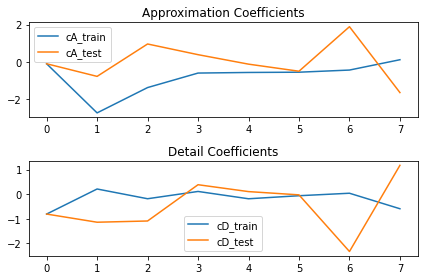

In [51]:
# Plot the approximation coefficients
plt.subplot(2, 1, 1)
plt.plot(cA_train[0], label='cA_train')
plt.plot(cA_test[0], label='cA_test')
plt.legend()
plt.title('Approximation Coefficients')

# Plot the detail coefficients
plt.subplot(2, 1, 2)
plt.plot(cD_train[0], label='cD_train')
plt.plot(cD_test[0], label='cD_test')
plt.legend()
plt.title('Detail Coefficients')

# Display the plot
plt.tight_layout()
plt.show()

## Continuous Wavelet Transform (CWT) + CNN

In [52]:
import pandas as pd
import numpy as np
import pywt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [53]:
dataEEG = pd.read_csv('../input/confused-eeg/EEG_data.csv')

In [54]:
dataEEG.head(10)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
5,0.0,0.0,44.0,66.0,73.0,1786446.0,176766.0,59352.0,26157.0,15054.0,33669.0,33782.0,31750.0,0.0,0.0
6,0.0,0.0,43.0,69.0,130.0,635191.0,122446.0,90107.0,65072.0,36230.0,53019.0,62938.0,59307.0,0.0,0.0
7,0.0,0.0,40.0,61.0,-2.0,161098.0,12119.0,1963.0,809.0,1277.0,3186.0,3266.0,2518.0,0.0,0.0
8,0.0,0.0,43.0,69.0,17.0,492796.0,120998.0,63697.0,68242.0,10769.0,88403.0,73756.0,22676.0,0.0,0.0
9,0.0,0.0,47.0,69.0,-59.0,82048.0,116131.0,47317.0,26197.0,41642.0,28866.0,32551.0,41810.0,0.0,0.0


In [55]:
X = dataEEG.iloc[:, :-1].values
y = dataEEG.iloc[:, -1].values

In [56]:
print(X)
print(y)

[[0.0000e+00 0.0000e+00 5.6000e+01 ... 3.3228e+04 8.2930e+03 0.0000e+00]
 [0.0000e+00 0.0000e+00 4.0000e+01 ... 5.2930e+03 2.7400e+03 0.0000e+00]
 [0.0000e+00 0.0000e+00 4.7000e+01 ... 5.7243e+04 2.5354e+04 0.0000e+00]
 ...
 [9.0000e+00 9.0000e+00 6.0000e+01 ... 2.0427e+04 2.0240e+03 1.0000e+00]
 [9.0000e+00 9.0000e+00 6.0000e+01 ... 1.2323e+04 1.7640e+03 1.0000e+00]
 [9.0000e+00 9.0000e+00 6.4000e+01 ... 2.2133e+04 4.4820e+03 1.0000e+00]]
[0. 0. 0. ... 0. 0. 0.]


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
cwt_data_train = []
cwt_data_test = []

In [59]:
for i in range(len(X_train)):
    cwt_coeff, _ = pywt.cwt(X_train[i], scales=np.arange(1, 128), wavelet='morl')
    cwt_data_train.append(cwt_coeff.flatten())

for i in range(len(X_test)):
    cwt_coeff, _ = pywt.cwt(X_test[i], scales=np.arange(1, 128), wavelet='morl')
    cwt_data_test.append(cwt_coeff.flatten())

In [60]:
cwt_data_train = np.array(cwt_data_train)
cwt_data_test = np.array(cwt_data_test)

In [61]:
cwt_data_train = cwt_data_train.reshape((cwt_data_train.shape[0], cwt_data_train.shape[1], 1))
cwt_data_test = cwt_data_test.reshape((cwt_data_test.shape[0], cwt_data_test.shape[1], 1))

In [62]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(cwt_data_train.shape[1], cwt_data_train.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1778, 1, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 889, 1, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28448)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3641472   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,641,921
Trainable params: 3,641,921
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])

In [64]:
cwt_data_train.shape

(10248, 1778, 1)

In [65]:
cwt_data_train0 = tf.expand_dims(cwt_data_train, axis=-1)

In [66]:
cwt_data_train0.shape

TensorShape([10248, 1778, 1, 1])

In [67]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [68]:
history = model.fit(cwt_data_train0, y_train, batch_size=64, epochs=10, validation_split=0.3)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/10
113/113 [==============================] - 12s 104ms/step - loss: 7.4219 - accuracy: 0.5160 - precision: 0.5161 - recall: 0.9984 - val_loss: 7.3550 - val_accuracy: 0.5203 - val_precision: 0.5203 - val_recall: 1.0000
Epoch 2/10
113/113 [==============================] - 12s 107ms/step - loss: 7.4197 - accuracy: 0.5161 - precision: 0.5161 - recall: 1.0000 - val_loss: 7.3550 - val_accuracy: 0.5203 - val_precision: 0.5203 - val_recall: 1.0000
Epoch 3/10
113/113 [==============================] - 12s 107ms/step - loss: 7.4197 - accuracy: 0.5161 - precision: 0.5161 - recall: 1.0000 - val_loss: 7.3550 - val_accuracy: 0.5203 - val_precision: 0.5203 - val_recall: 1.0000
Epoch 4/10
113/113 [==============================] - 12s 109ms/step - loss: 7.4197 - accuracy: 0.5161 - precision: 0.5161 - recall: 1.0000 - val_loss: 7.3550 - val_accuracy: 0.5203 - val_precision: 0.5203 - val_recall: 1.0000
Epoch 5/10
113/113 [==============================] - 12s 107ms/step - loss: 7.4197 - accura

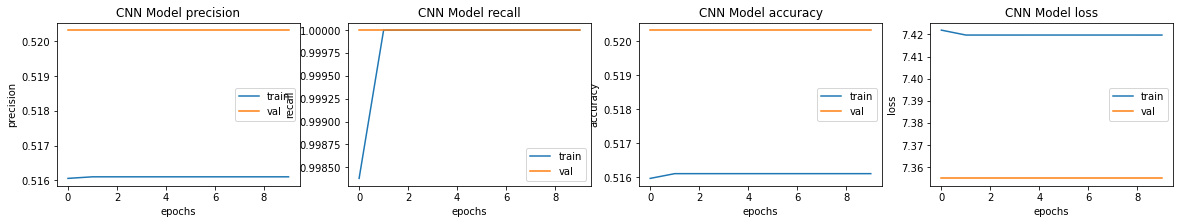

In [69]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('CNN Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])